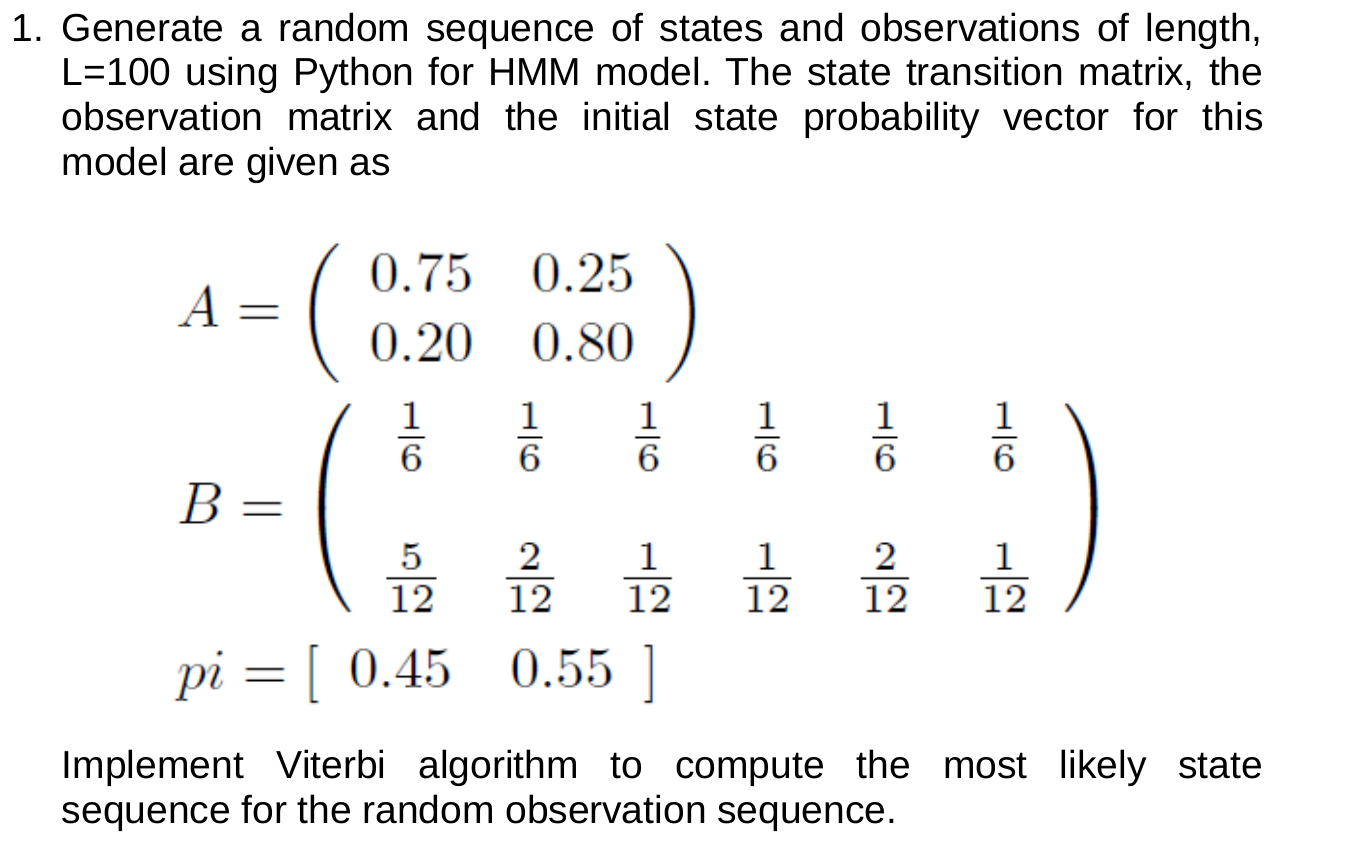

In [1]:
def viterbi(obs, states, start_p, trans_p, emit_p):
    """
    Given a sequence of observations `obs`, a set of possible states `states`,
    an initial probability distribution `start_p`, a transition probability
    matrix `trans_p`, and an emission probability matrix `emit_p`, compute the
    most likely sequence of hidden states that produced the observations using
    the Viterbi algorithm.
    """
    # Initialize the trellis matrix
    trellis = [{}]
    for state in states:
        trellis[0][state] = {"prob": start_p[state] * emit_p[state][obs[0]], "prev": None}

    # Fill in the rest of the trellis matrix
    for t in range(1, len(obs)):
        trellis.append({})
        for state in states:
            # Find the maximum probability and corresponding previous state
            max_prob = max(trellis[t-1][prev_state]["prob"] * trans_p[prev_state][state] * emit_p[state][obs[t]] for prev_state in states)
            prev_state = max(states, key=lambda prev_state: trellis[t-1][prev_state]["prob"] * trans_p[prev_state][state] * emit_p[state][obs[t]])
            # Add the maximum probability and corresponding previous state to the trellis
            trellis[t][state] = {"prob": max_prob, "prev": prev_state}

    # Find the maximum probability and corresponding end state
    max_prob = max(trellis[-1][state]["prob"] for state in states)
    end_state = max(states, key=lambda state: trellis[-1][state]["prob"])

    # Follow the backpointers to recover the most likely state sequence
    state_seq = [end_state]
    for t in range(len(obs)-1, 0, -1):
        state_seq.insert(0, trellis[t][state_seq[0]]["prev"])

    return state_seq


In [2]:
import random
random_obs = []
for i in range(100):
  random_obs.append(random.randint(1,6))
# random_obs
random_obs

[4,
 2,
 6,
 1,
 5,
 2,
 6,
 4,
 6,
 6,
 4,
 3,
 3,
 6,
 1,
 6,
 1,
 3,
 1,
 5,
 3,
 2,
 2,
 1,
 4,
 2,
 1,
 4,
 6,
 1,
 4,
 6,
 3,
 3,
 6,
 2,
 6,
 6,
 6,
 1,
 5,
 6,
 5,
 6,
 5,
 3,
 2,
 1,
 3,
 4,
 2,
 3,
 5,
 3,
 4,
 2,
 6,
 4,
 1,
 6,
 1,
 2,
 1,
 5,
 1,
 4,
 5,
 3,
 4,
 4,
 4,
 1,
 3,
 3,
 6,
 3,
 1,
 6,
 4,
 1,
 6,
 3,
 4,
 3,
 5,
 6,
 1,
 5,
 2,
 6,
 2,
 2,
 5,
 4,
 5,
 2,
 6,
 2,
 5,
 3]

In [3]:
obs = []
for i in range(len(random_obs)):
  obs.append("o"+str(random_obs[i]))

In [4]:
obs

['o4',
 'o2',
 'o6',
 'o1',
 'o5',
 'o2',
 'o6',
 'o4',
 'o6',
 'o6',
 'o4',
 'o3',
 'o3',
 'o6',
 'o1',
 'o6',
 'o1',
 'o3',
 'o1',
 'o5',
 'o3',
 'o2',
 'o2',
 'o1',
 'o4',
 'o2',
 'o1',
 'o4',
 'o6',
 'o1',
 'o4',
 'o6',
 'o3',
 'o3',
 'o6',
 'o2',
 'o6',
 'o6',
 'o6',
 'o1',
 'o5',
 'o6',
 'o5',
 'o6',
 'o5',
 'o3',
 'o2',
 'o1',
 'o3',
 'o4',
 'o2',
 'o3',
 'o5',
 'o3',
 'o4',
 'o2',
 'o6',
 'o4',
 'o1',
 'o6',
 'o1',
 'o2',
 'o1',
 'o5',
 'o1',
 'o4',
 'o5',
 'o3',
 'o4',
 'o4',
 'o4',
 'o1',
 'o3',
 'o3',
 'o6',
 'o3',
 'o1',
 'o6',
 'o4',
 'o1',
 'o6',
 'o3',
 'o4',
 'o3',
 'o5',
 'o6',
 'o1',
 'o5',
 'o2',
 'o6',
 'o2',
 'o2',
 'o5',
 'o4',
 'o5',
 'o2',
 'o6',
 'o2',
 'o5',
 'o3']

In [5]:
# Example usage
# obs = ["o1", "o2", "o3","o4", "o5", "o6"]
# obs = [0,1,2,3,4,5,6]
states = ["s1", "s2"]
start_p = {"s1": 0.45, "s2": 0.55}
trans_p = {
    "s1": {"s1": 0.75, "s2": 0.25},
    "s2": {"s1": 0.2, "s2": 0.8}
}
emit_p = {
    "s1": {"o1": 0.167, "o2": 0.167, "o3": 0.167, "o4": 0.167, "o5": 0.167, "o6": 0.167},
    "s2": {"o1": 0.417, "o2": 0.167, "o3": 0.083, "o4": 0.083, "o5": 0.167, "o6": 0.083}
}

# emit_p = {
#     "s1": {0: 0.167, 1: 0.167, 2: 0.167, 3: 0.167, 4: 0.167, 5: 0.167},
#     "s2": {1: 0.417, 2: 0.167, 3: 0.083, 4: 0.083, : 0.167, "o6": 0.083}
# }

state_seq = viterbi(obs, states, start_p, trans_p, emit_p)
print(state_seq) # Output: ['Healthy', 'Healthy', 'Fever']


['s1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's2', 's2', 's2', 's2', 's2', 's2', 's2', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1', 's1']
